<Figure size 640x480 with 0 Axes>

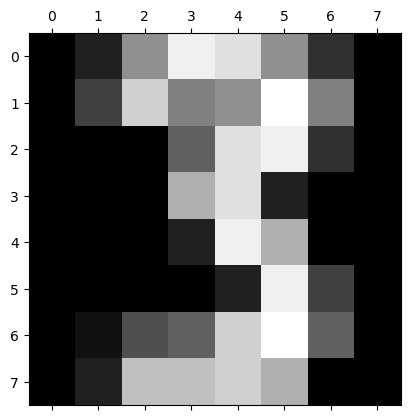

Test Acc:0.856
分类报告：


NameError: name 'classification_report' is not defined

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

# 提取样本数据
digist = datasets.load_digits()
feature = digist.data
target = digist.target

# print(feature)
# print(feature.shape)  # (1797, 64)
# print(target.shape)# (1797,)
# print(feature[0])   # 8*8像素  1*64
import matplotlib.pyplot as plt
plt.gray()  
plt.matshow(digist.images[13])
plt.show()  #查看图像

# 切分数据
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.1)
gis = GaussianNB()
gis.fit(x_train,y_train)
y_pred = gis.predict(x_test) #进行预测

#  模型评估
acc = np.sum(y_test == y_pred)/x_test.shape[0]
print("Test Acc:%.3f"%acc)
print("分类报告：")
print(classification_report(y_test, y_pred,zero_division=1))

In [41]:
#高斯贝叶斯
from sklearn import datasets
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np


# 1、获取数据集
iris = datasets.load_iris()

#数据详情
# print(iris.data)
# print(iris.feature_names)
# print(iris.target)
# print(iris.target_names)

# 2、划分数据集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)

#  3、训练模型
clf = GaussianNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test) #进行预测

#  4、模型评估
acc = np.sum(y_test == y_pred)/x_test.shape[0]
print("Test Acc:%.3f"%acc)
print("分类报告：")
print(classification_report(y_test, y_pred,zero_division=1))

Test Acc:0.921
分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      0.90      0.86        10
           2       0.93      0.87      0.90        15

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [3]:
#多项式贝叶斯
from sklearn.datasets import fetch_20newsgroups#自带数据集
from sklearn.model_selection import train_test_split#切分测试集
from sklearn.feature_extraction.text import TfidfVectorizer#tf-idf
from sklearn.naive_bayes import MultinomialNB,ComplementNB#贝叶斯
from sklearn.metrics import classification_report


news = fetch_20newsgroups(subset='all')

#print(news.target_names) #查看标签名
#划分数据集
x_train, x_test, y_train, y_test = train_test_split(news.data,news.target)

#对数据集进行提取
tf = TfidfVectorizer()

x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

# print(tf.vocabulary_)
# print(x_train)  #返回文本索引和权重
# print(x_test)
# print(tf.get_feature_names_out())

mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train,y_train)
y_predict = mlt.predict(x_test)
print(x_train.toarray())#默认为sparse形式，转化为array形式

#得出准确率
print(y_predict)
print("准确率为：",mlt.score(x_test,y_test))
print("分类报告：")
print(classification_report(y_test, y_predict,zero_division=1))
# 补集贝叶斯
com = ComplementNB()
com.fit(x_train,y_train)
y_predict = com.predict(x_test)
print(x_train.toarray())#默认为sparse形式，转化为array形式

#得出准确率
print(y_predict)
print("准确率为：",com.score(x_test,y_test))
print("分类报告：")
print(classification_report(y_test, y_predict,zero_division=1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 3  7  0 ...  1 15 14]
准确率为： 0.8518675721561969
分类报告：
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       210
           1       0.89      0.78      0.83       236
           2       0.86      0.86      0.86       247
           3       0.76      0.83      0.79       250
           4       0.93      0.85      0.89       254
           5       0.95      0.83      0.89       261
           6       0.95      0.71      0.81       232
           7       0.89      0.91      0.90       243
           8       0.92      0.96      0.94       252
           9       0.93      0.95      0.94       242
          10       0.91      0.97      0.94       262
          11       0.74      0.96      0.83       240
          12       0.89      0.84      0.86       239
          13       0.97      0.8

In [5]:
# 读取数据
import pandas as pd  
import numpy as np  
from sklearn import preprocessing  
from sklearn.metrics import log_loss  
from sklearn.model_selection import train_test_split
train = pd.read_csv('F:/yanjiusheng/汇报/data/train.csv', parse_dates = ['Dates'])  
test = pd.read_csv('F:/yanjiusheng/汇报/data/test.csv', parse_dates = ['Dates'])  
train 


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [48]:

#对犯罪类别:Category; 用LabelEncoder进行编号  
leCrime = preprocessing.LabelEncoder()  
crime = leCrime.fit_transform(train.Category)   #39种犯罪类型  
#用get_dummies因子化星期几、街区、小时等特征
#根据有无含"Block",对Address进行区分

days=pd.get_dummies(train.DayOfWeek)  
district = pd.get_dummies(train.PdDistrict)  
hour = train.Dates.dt.hour  
hour = pd.get_dummies(hour)
train['Block'] = train['Address'].str.contains('block', case=False)
train.loc[(train.Block == False),"Block"] = "0"
train.loc[(train.Block == True),"Block"] = "1"

#组合特征  
trainData = pd.concat([hour, days, district], axis = 1)  #将特征进行横向组合  
trainData['ADD'] = train['Block']
trainData['crime'] = crime   #追加'crime'列  
trainData.iloc[:,1:43]


,1,2,3,4,5,6,7,8,9,10,...,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,ADD,crime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,37
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,21
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,21
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,25
878045,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,16
878046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,16
878047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,35


In [50]:
from sklearn.naive_bayes import BernoulliNB
import time
# 需要将列名从[str, int]转换为string 
trainData.columns = trainData.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(trainData.iloc[:,1:42], trainData['crime'], train_size=0.6)  
NB = BernoulliNB()  
nbStart = time.time()  
NB.fit(X_train, y_train)  
nbCostTime = time.time() - nbStart  
#print(X_test.shape)  
propa = NB.predict_proba(X_test)   #X_test为263415*17； 那么该行就是将263415分到39种犯罪类型中，每个样本被分到每一种的概率  
print("朴素贝叶斯建模%.2f秒"%(nbCostTime))  
predicted = np.array(propa)  
logLoss=log_loss(y_test, predicted)  
print("朴素贝叶斯的log损失为:%.6f"%logLoss)  
print("分类报告：")
print(classification_report(y_test, y_predict,zero_division=1))

朴素贝叶斯建模2.17秒
朴素贝叶斯的log损失为:2.539814
分类报告：
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       603
           1       0.09      0.09      0.09     31028
           2       1.00      0.00      0.00       152
           3       1.00      0.00      0.00       109
           4       0.04      0.04      0.04     14729
           5       1.00      0.00      0.00      1699
           6       1.00      0.00      0.00       896
           7       0.06      0.10      0.08     21841
           8       1.00      0.00      0.00      1695
           9       1.00      0.00      0.00       485
          10       1.00      0.00      0.00       112
          11       1.00      0.00      0.00       203
          12       1.00      0.00      0.00      4367
          13       1.00      0.00      0.00      6566
          14       1.00      0.00      0.00        60
          15       1.00      0.00      0.00       958
          16       0.20      0.37      0

In [12]:
print(district)

        BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
0             1        0          0        0         0     0         0   
1             1        0          0        0         0     0         0   
2             0        0          0        0         1     0         0   
3             0        0          1        0         0     0         0   
4             0        0          1        0         0     0         0   
...         ...      ...        ...      ...       ...   ...       ...   
884257        0        0          0        1         0     0         0   
884258        0        0          0        0         1     0         0   
884259        0        0          1        0         0     0         0   
884260        1        0          0        0         0     0         0   
884261        0        0          0        0         0     0         0   

        SOUTHERN  TARAVAL  TENDERLOIN  
0              0        0           0  
1              0        0      

In [13]:

trainData = pd.concat([hour, days, district], axis = 1) 
print(trainData)

        0  1  2  3  4  5  6  7  8  9  ...  BAYVIEW  CENTRAL  INGLESIDE  \
0       0  0  0  0  0  0  0  0  0  0  ...        1        0          0   
1       0  0  0  0  0  0  0  0  0  0  ...        1        0          0   
2       0  0  0  0  0  0  0  0  0  0  ...        0        0          0   
3       0  0  0  0  0  0  0  0  0  0  ...        0        0          1   
4       0  0  0  0  0  0  0  0  0  0  ...        0        0          1   
...    .. .. .. .. .. .. .. .. .. ..  ...      ...      ...        ...   
884257  1  0  0  0  0  0  0  0  0  0  ...        0        0          0   
884258  1  0  0  0  0  0  0  0  0  0  ...        0        0          0   
884259  1  0  0  0  0  0  0  0  0  0  ...        0        0          1   
884260  1  0  0  0  0  0  0  0  0  0  ...        1        0          0   
884261  1  0  0  0  0  0  0  0  0  0  ...        0        0          0   

        MISSION  NORTHERN  PARK  RICHMOND  SOUTHERN  TARAVAL  TENDERLOIN  
0             0         0     0     

In [14]:
print(hour)

        0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  \
0        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
4        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
884257   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
884258   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
884259   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
884260   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
884261   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

        20  21  22  23  
0        0   0   0   1  
1

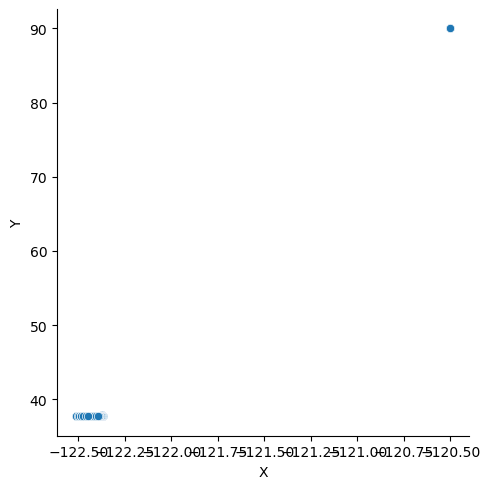

In [2]:

import seaborn as sns
sns.relplot(x="X",y="Y",data = train)

In [18]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB#贝叶斯


data = train.drop(["X","Y"],axis = 1)
data['crime'] = crime  #对犯罪类别编码
hour = train.Dates.dt.hour
data["hour"] = hour  #提取日期中的小时
data['Block'] = data['Address'].str.contains('block', case=False)
data.loc[(data.Block == False),"Block"] = "0"
data.loc[(data.Block == True),"Block"] = "1"

feature = ["hour","DayOfWeek","PdDistrict","Block"]
x_train, x_test, y_train, y_test = train_test_split(data[feature], data['crime'], train_size=0.6)

x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train_encoded,y_train)
y_predict = mlt.predict(x_test_encoded)

#得出准确率
print(y_predict)
print("分类报告：")
print(classification_report(y_test, y_predict,zero_division=1))

[16 16  1 ... 16 16 16]
分类报告：
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       598
           1       0.15      0.06      0.08     30925
           2       1.00      0.00      0.00       170
           3       1.00      0.00      0.00       108
           4       1.00      0.00      0.00     14677
           5       1.00      0.00      0.00      1746
           6       1.00      0.00      0.00       930
           7       0.22      0.28      0.24     21589
           8       1.00      0.00      0.00      1739
           9       1.00      0.00      0.00       483
          10       1.00      0.00      0.00       104
          11       1.00      0.00      0.00       198
          12       1.00      0.00      0.00      4292
          13       1.00      0.00      0.00      6675
          14       1.00      0.00      0.00        55
          15       1.00      0.00      0.00       952
          16       0.24      0.78      0.36     701

In [20]:
#补集朴素贝叶斯
mlt = ComplementNB()
mlt.fit(x_train_encoded,y_train)
y_predict = mlt.predict(x_test_encoded)

#得出准确率
print(y_predict)
print("分类报告：")
print(classification_report(y_test, y_predict,zero_division=1))

[16 16  1 ... 16 16 21]
分类报告：
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       598
           1       0.13      0.13      0.13     30925
           2       1.00      0.00      0.00       170
           3       1.00      0.00      0.00       108
           4       0.08      0.07      0.08     14677
           5       1.00      0.00      0.00      1746
           6       1.00      0.00      0.00       930
           7       0.21      0.34      0.26     21589
           8       1.00      0.00      0.00      1739
           9       1.00      0.00      0.00       483
          10       1.00      0.00      0.00       104
          11       1.00      0.00      0.00       198
          12       1.00      0.00      0.00      4292
          13       1.00      0.00      0.00      6675
          14       1.00      0.00      0.00        55
          15       1.00      0.00      0.00       952
          16       0.28      0.53      0.37     701